<a href="https://colab.research.google.com/github/gatherheart/DAppServer/blob/master/Marcov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basics
import numpy as np

np.random.seed(2015318385)

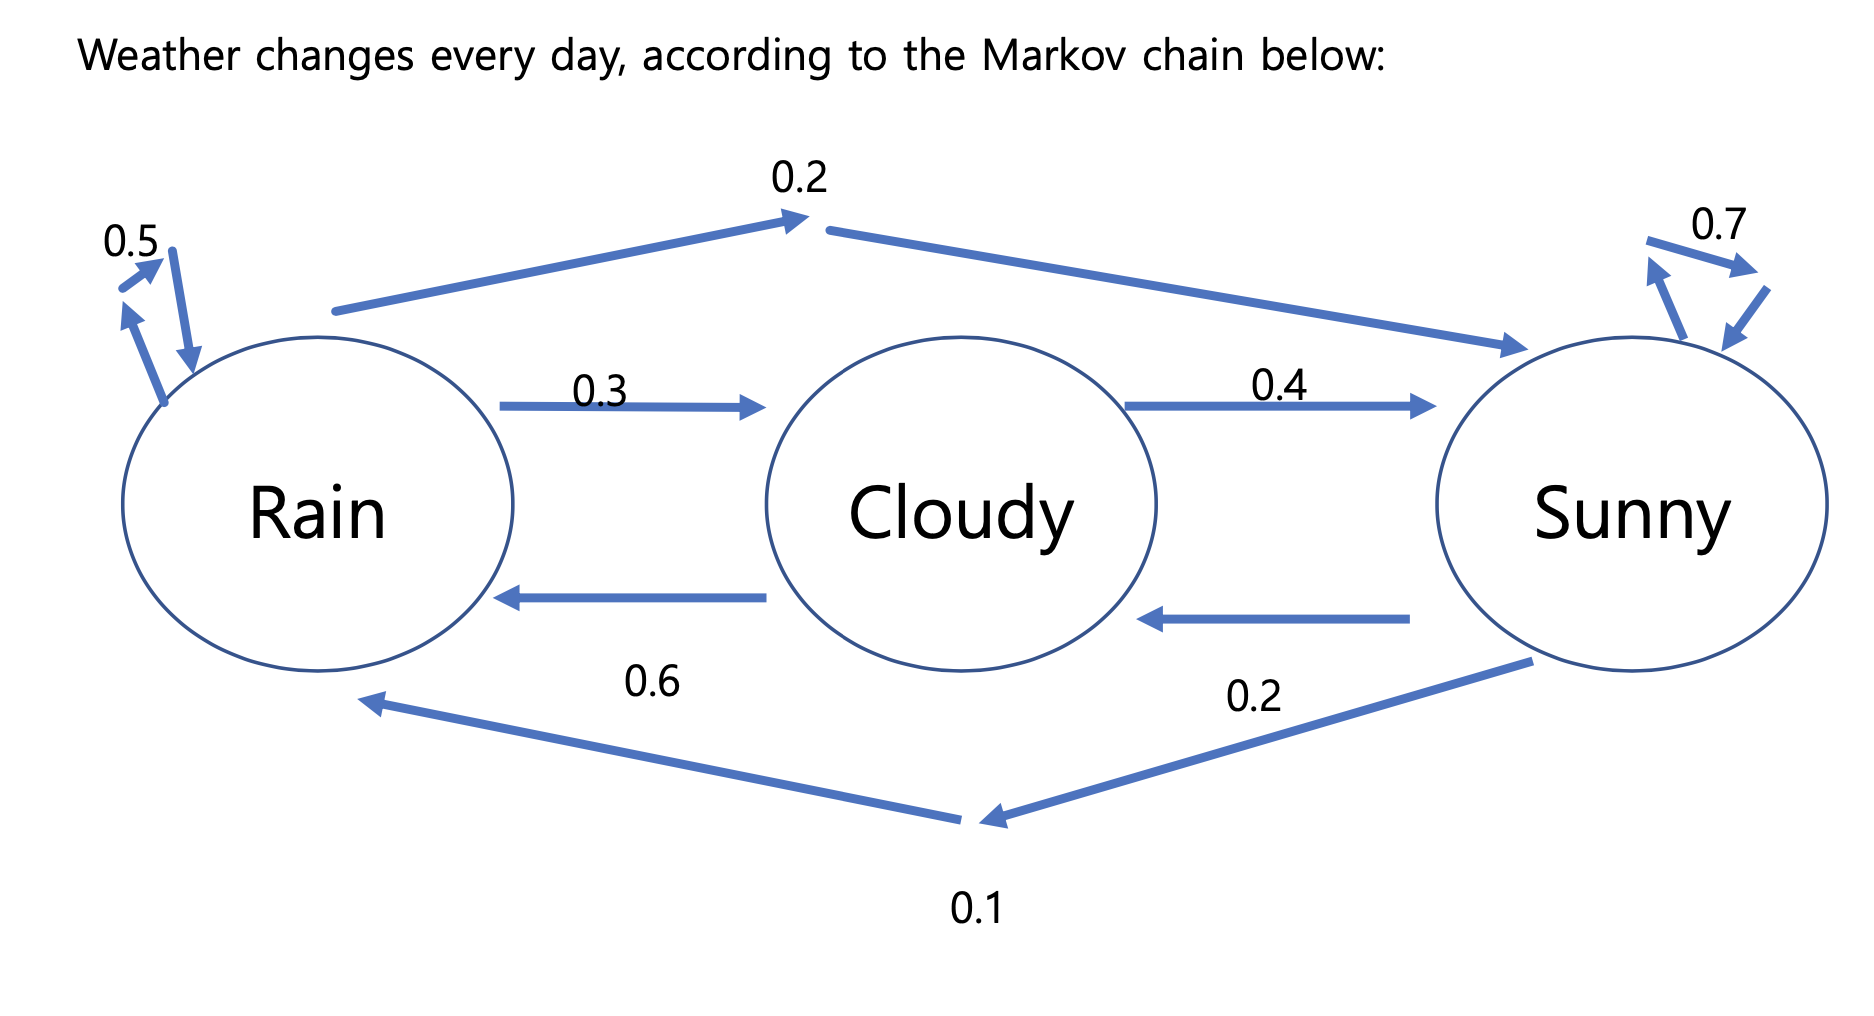

In [2]:
'''
       Rainy Cloudy Sunny

Rainy  0.5.  0.3.  0.2

Cloudy 0.6.  0.0.  0.4

Sunny  0.1.  0.2.  0.7 

'''
process = np.array([
       [0.5,  0.3,  0.2],
       [0.6,  0.0,  0.4],
       [0.1,  0.2,  0.7],
])

In [3]:
transmission_rate = {'Sunny': 10, 'Cloudy': 5, 'Rainy': 1}

In [4]:
convert_to_index = {'Sunny': 2, 'Cloudy': 1, 'Rainy': 0}
convert_to_state = {v: k for k, v in convert_to_index.items()}

In [5]:
convert_to_state

{0: 'Rainy', 1: 'Cloudy', 2: 'Sunny'}

Q11. Initially, starting from Sunny state, simulate the number of days required to send 100MB data, assuming ISS can send the data once a day and weather changes every day. Your simulation output must be as follows: <br/>
Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB) <br/>
1, Sunny, 10, 10, 90 <br/>
2, Sunny, 10, 20, 80 <br/>
3, Cloudy, 5, 25, 75 <br/>


In [6]:
'''
random_number = np.random.rand()

0 ............. 1
[    1   ][2][ 3 ]
0.5       0.7 1.0
Area
0.5       0.2 0.3
probability
'''

'''
@Params 
current = current State value ex) 'Sunny'
table = random process array (stochastic array)

@Return
new state = new current state
random = probability that used
'''
def route(current, table):
  _from = convert_to_index[current]
  probs = process[_from]
  area_probs = probs.cumsum()
  # ex) [0.  0.6 0.6 1. ]
  # 0 < x < 0.6 -> go to Sunny
  area_probs = np.append([0], area_probs)
  random = np.random.rand()
  _to = np.where(area_probs < random)[-1][-1]
  return (convert_to_state[_to], random)

<h3> Test for route function </h3>

In [7]:
route('Rainy', process)

('Rainy', 0.23446535832587379)

In [14]:
# Initialize
buffer = 100
sent = 0
total_sent = 0

# First Step
current = 'Sunny'
sent = transmission_rate[current]
buffer -= sent
total_sent += sent
day = 1

print("Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)")
while True:
    print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))
    
    # Route to new state
    current, _ = route(current, process)
    # Calculate 
    sent = transmission_rate[current] if buffer - transmission_rate[current] > 0 else buffer
    buffer -= sent
    total_sent += sent
    day += 1
    
    if buffer <= 0:
      break

print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))

Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)
  1,   Sunny,             10,                  10,                       90
  2,   Rainy,              1,                  11,                       89
  3,   Rainy,              1,                  12,                       88
  4,   Rainy,              1,                  13,                       87
  5,   Sunny,             10,                  23,                       77
  6,   Sunny,             10,                  33,                       67
  7,   Sunny,             10,                  43,                       57
  8,   Rainy,              1,                  44,                       56
  9,  Cloudy,              5,                  49,                       51
 10,   Rainy,              1,                  50,                       50
 11,   Sunny,             10,                  60,                       40
 12,   Sunny,             10,                  70,                       30

In [15]:
# Initialize
buffer = 100
sent = 0
total_sent = 0

# First Step
current = 'Cloudy'
sent = transmission_rate[current]
buffer -= sent
total_sent += sent
day = 1

print("Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)")
while True:
    print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))
    
    # Route to new state
    current, _ = route(current, process)
    # Calculate 
    sent = transmission_rate[current] if buffer - transmission_rate[current] > 0 else buffer
    buffer -= sent
    total_sent += sent
    day += 1
    
    if buffer <= 0:
      break

print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))

Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)
  1,  Cloudy,              5,                   5,                       95
  2,   Sunny,             10,                  15,                       85
  3,   Sunny,             10,                  25,                       75
  4,  Cloudy,              5,                  30,                       70
  5,   Rainy,              1,                  31,                       69
  6,   Rainy,              1,                  32,                       68
  7,   Rainy,              1,                  33,                       67
  8,   Rainy,              1,                  34,                       66
  9,   Rainy,              1,                  35,                       65
 10,   Sunny,             10,                  45,                       55
 11,  Cloudy,              5,                  50,                       50
 12,   Rainy,              1,                  51,                       49

In [16]:
# Initialize
buffer = 100
sent = 0
total_sent = 0

# First Step
current = 'Rainy'
sent = transmission_rate[current]
buffer -= sent
total_sent += sent
day = 1

print("Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)")
while True:
    print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))
    
    # Route to new state
    current, _ = route(current, process)
    # Calculate 
    sent = transmission_rate[current] if buffer - transmission_rate[current] > 0 else buffer
    buffer -= sent
    total_sent += sent
    day += 1
    
    if buffer <= 0:
      break

print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))

Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)
  1,   Rainy,              1,                   1,                       99
  2,  Cloudy,              5,                   6,                       94
  3,   Rainy,              1,                   7,                       93
  4,   Sunny,             10,                  17,                       83
  5,  Cloudy,              5,                  22,                       78
  6,   Rainy,              1,                  23,                       77
  7,   Sunny,             10,                  33,                       67
  8,   Sunny,             10,                  43,                       57
  9,   Rainy,              1,                  44,                       56
 10,  Cloudy,              5,                  49,                       51
 11,   Rainy,              1,                  50,                       50
 12,   Rainy,              1,                  51,                       49

Q14. If a 100MB new data is generated every 10th day, plot the number of data in the buffer to be sent to the ground station for 30 days. We assume weather starts from Sunny state. And in the plot, the X-axis is the day from 1,2,...,30 and the Y-axis is the number of data in the buffer (MB) to be sent to the ground.

In [22]:
# Initialize
buffer = 100
sent = 0
total_sent = 0

# First Step
current = 'Sunny'
sent = transmission_rate[current]
buffer -= sent
total_sent += sent
day = 1
history = [100]

print("Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)")
while True:
    print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))
    
    # Route to new state
    current, _ = route(current, process)
    # Calculate 
    sent = transmission_rate[current] if buffer - transmission_rate[current] > 0 else buffer
    buffer -= sent
    total_sent += sent
    day += 1
    history.append(buffer)
    
    if day > 30:
      break
    elif day % 10 == 0:
      buffer += 100



Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)
  1,   Sunny,             10,                  10,                       90
  2,   Sunny,             10,                  20,                       80
  3,  Cloudy,              5,                  25,                       75
  4,   Rainy,              1,                  26,                       74
  5,   Rainy,              1,                  27,                       73
  6,   Rainy,              1,                  28,                       72
  7,   Rainy,              1,                  29,                       71
  8,   Sunny,             10,                  39,                       61
  9,  Cloudy,              5,                  44,                       56
 10,   Sunny,             10,                  54,                      146
 11,   Sunny,             10,                  64,                      136
 12,   Rainy,              1,                  65,                      135

Text(0.5, 1.0, 'Marcov Chain Process: Before transmission')

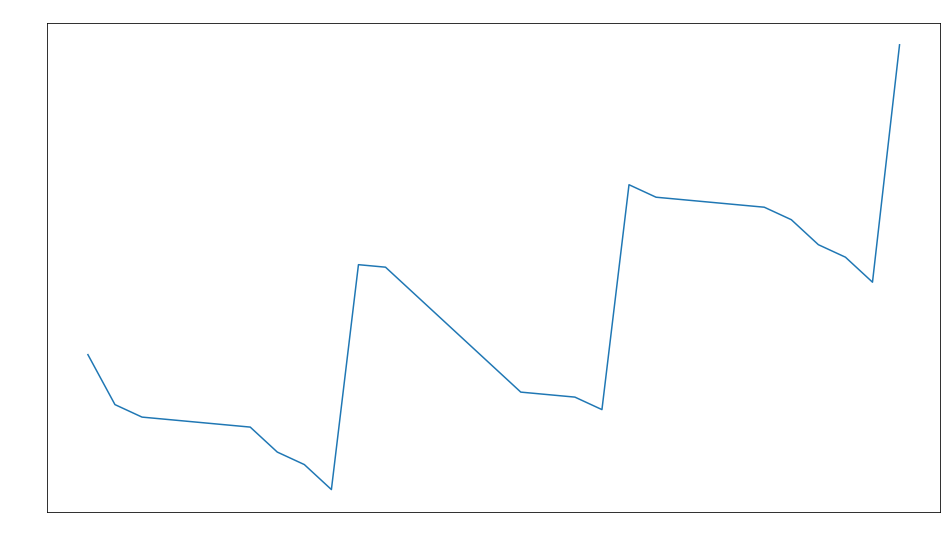

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot([None, *history])
plt.tick_params(axis='x', colors='w')
plt.xticks(range(1, 31, 1))
plt.tick_params(axis='y', colors='w')
plt.xlabel("Day", fontdict={'color': 'w'})
plt.ylabel("Data to be sent", fontdict={'color': 'w'})
plt.title("Marcov Chain Process: Before transmission", fontdict={'color': 'w'})

In [43]:
# Initialize
buffer = 100
sent = 0
total_sent = 0

# First Step
current = 'Sunny'
sent = transmission_rate[current]
buffer -= sent
total_sent += sent
day = 1
history = [buffer]

print("Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)")
while True:
    print(" {:2},{:>8},{:15},{:20},{:25}".format(day, current, sent, total_sent, buffer))
    
    # Route to new state
    current, _ = route(current, process)
    # Calculate 
    sent = transmission_rate[current] if buffer - transmission_rate[current] > 0 else buffer
    buffer -= sent
    total_sent += sent
    day += 1
    history.append(buffer)
    
    if day > 30:
      break
    elif day % 10 == 0:
      buffer += 100



Day, Current State, CurrnetDataSent(MB), TotalSent (MB), RemainingData in the buffer(MB)
  1,   Sunny,             10,                  10,                       90
  2,   Sunny,             10,                  20,                       80
  3,  Cloudy,              5,                  25,                       75
  4,   Sunny,             10,                  35,                       65
  5,   Sunny,             10,                  45,                       55
  6,  Cloudy,              5,                  50,                       50
  7,   Sunny,             10,                  60,                       40
  8,   Sunny,             10,                  70,                       30
  9,   Sunny,             10,                  80,                       20
 10,  Cloudy,              5,                  85,                      115
 11,   Sunny,             10,                  95,                      105
 12,   Sunny,             10,                 105,                       95

Text(0.5, 1.0, 'Marcov Chain Process: After transmission')

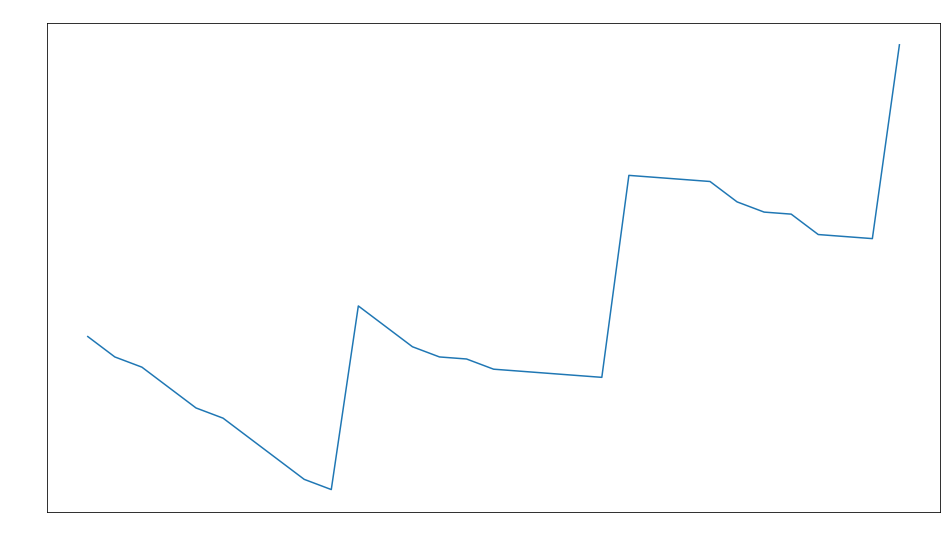

In [45]:
plt.figure(figsize=(16, 9))
plt.plot([None, *history])
plt.tick_params(axis='x', colors='w')
plt.xticks(range(1, 31, 1))
plt.tick_params(axis='y', colors='w')
plt.xlabel("Day", fontdict={'color': 'w'})
plt.ylabel("Data to be sent", fontdict={'color': 'w'})
plt.title("Marcov Chain Process: After transmission", fontdict={'color': 'w'})